# Final Project: Tweet Sentiment Analysis

## Part 1: Loading and Preprocessing Data

In [37]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

tweets_df = pd.read_csv("training.1600000.processed.noemoticon.csv", names= ['sentiment', 'id', 'time', 'flag', 'user', 'tweet'])
print(tweets_df.columns)
display(tweets_df.head())

Index(['sentiment', 'id', 'time', 'flag', 'user', 'tweet'], dtype='object')


,sentiment,id,time,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [38]:
tweets_df = tweets_df[['tweet', 'sentiment']]
MAP = {0: "NEG", 4: "POS"}
tweets_df["sentiment"] = tweets_df.sentiment.map(MAP)

print('The dataset consists of {} features & {} samples.'.format(tweets_df.shape[1], tweets_df.shape[0]))
print('\nThe dataset has {} missing values.\n'.format(tweets_df.isnull().any(axis = 1).sum()))
display(tweets_df.head())

The dataset consists of 2 features & 1600000 samples.

The dataset has 0 missing values.



,tweet,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NEG
1,is upset that he can't update his Facebook by ...,NEG
2,@Kenichan I dived many times for the ball. Man...,NEG
3,my whole body feels itchy and like its on fire,NEG
4,"@nationwideclass no, it's not behaving at all....",NEG


In [39]:
from tqdm import tqdm
from gensim.utils import simple_preprocess

tweets_df['tokenized_tweet'] = tweets_df['tweet']
for index, tweet in enumerate(tqdm(tweets_df.iterrows(), total= 1600000)):
    tweets_df.at[index, 'tokenized_tweet'] = simple_preprocess(tweets_df.at[index, 'tweet'], deacc= True)

display(tweets_df.head())

100%|██████████| 1600000/1600000 [04:34<00:00, 5836.92it/s]


,tweet,sentiment,tokenized_tweet
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NEG,"[switchfoot, http, twitpic, com, zl, awww, tha..."
1,is upset that he can't update his Facebook by ...,NEG,"[is, upset, that, he, can, update, his, facebo..."
2,@Kenichan I dived many times for the ball. Man...,NEG,"[kenichan, dived, many, times, for, the, ball,..."
3,my whole body feels itchy and like its on fire,NEG,"[my, whole, body, feels, itchy, and, like, its..."
4,"@nationwideclass no, it's not behaving at all....",NEG,"[nationwideclass, no, it, not, behaving, at, a..."


In [40]:
from nltk.stem import SnowballStemmer

tweets_df['stemmed_tokens'] = tweets_df['tokenized_tweet']
for index, tweet in enumerate(tqdm(tweets_df.iterrows(), total= 1600000)):
    tweets_df.at[index, 'stemmed_tokens'] = [SnowballStemmer("english").stem(word) for word in tweets_df.at[index, 'tokenized_tweet']]

display(tweets_df.head())

100%|██████████| 1600000/1600000 [07:47<00:00, 3424.80it/s]


,tweet,sentiment,tokenized_tweet,stemmed_tokens
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",NEG,"[switchfoot, http, twitpic, com, zl, awww, tha...","[switchfoot, http, twitpic, com, zl, awww, tha..."
1,is upset that he can't update his Facebook by ...,NEG,"[is, upset, that, he, can, update, his, facebo...","[is, upset, that, he, can, updat, his, faceboo..."
2,@Kenichan I dived many times for the ball. Man...,NEG,"[kenichan, dived, many, times, for, the, ball,...","[kenichan, dive, mani, time, for, the, ball, m..."
3,my whole body feels itchy and like its on fire,NEG,"[my, whole, body, feels, itchy, and, like, its...","[my, whole, bodi, feel, itchi, and, like, it, ..."
4,"@nationwideclass no, it's not behaving at all....",NEG,"[nationwideclass, no, it, not, behaving, at, a...","[nationwideclass, no, it, not, behav, at, all,..."


## Part 2: Exploratory Data Analysis

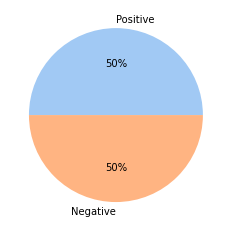

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

proportions = tweets_df['sentiment'].value_counts()
colors = sns.color_palette('pastel')[0:2]
plt.pie(proportions, labels= ['Positive', 'Negative'], colors= colors, autopct='%.0f%%')
plt.show()

## Part 3: Training and Using the Word2Vec Model

In [42]:
import multiprocessing
from gensim.models import Word2Vec
from os.path import exists
import time

size = 600
window = 3
min_count = 1
workers = multiprocessing.cpu_count()
sg = 1

word2vec_model_file = './models/' + 'word2vec_' + str(size) + '.model'

if not exists(word2vec_model_file):
    print("Model not found, a new model will be trained.")
    start_time = time.time()
    stemmed_tokens = pd.Series(tweets_df['stemmed_tokens']).values

    w2v_model = Word2Vec(stemmed_tokens, min_count= min_count, size= size, workers= workers, window= window, sg= s)
    print("Time taken to train word2vec model: " + str(time.time() - start_time) + "seconds")
    w2v_model.save(word2vec_model_file)
else:
    print("Using pre-existing model: {}".format(word2vec_model_file))

Using pre-existing model: ./models/word2vec_600.model


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tweets_df['stemmed_tokens'], tweets_df['sentiment'], test_size= .3, random_state= 420)

X_train = X_train.reset_index()
X_test = X_test.reset_index()
Y_train = Y_train.to_frame()
Y_train = Y_train.reset_index()
Y_test = Y_test.to_frame()
Y_test = Y_test.reset_index()

display(X_train.head())

,index,stemmed_tokens
0,732210,"[finish, watch, monster, vs, alien, avg, movi,..."
1,1125598,"[nesquicus, yes, inde, it, was, wooot, subo, w..."
2,1014391,"[happi, to, see, lot, of, new, familiar, face,..."
3,1131784,"[http, tinyurl, com, ry, wap, hi, am, look, fo..."
4,580034,"[wanna, have, bubbl, bath, but, that, hard, to..."


In [44]:
import numpy as np

sg_w2v_model = Word2Vec.load(word2vec_model_file)

word2vec_filename = './models/' + 'train_review_word2vec.csv'

if not exists(word2vec_filename):
    print("No embeddings found, new embeddings will be created")
    with open(word2vec_filename, 'w+') as word2vec_file:
        for index, row in tqdm(X_train.iterrows(), total= int(0.7 * 1600000)):
            model_vector = (np.mean([sg_w2v_model[token] for token in row['stemmed_tokens']], axis= 0)).tolist()
            if index == 0:
                header = ",".join(str(ele) for ele in range(600))
                word2vec_file.write(header)
                word2vec_file.write("\n")
            if type(model_vector) is list:
                line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
            else:
                line1 = ",".join([str(0) for i in range(600)])

            word2vec_file.write(line1)
            word2vec_file.write('\n')
else:
    print("Existing embeddings found")

Existing embeddings found


In [45]:
word2vec_filename = './models/' + 'test_review_word2vec.csv'

if not exists(word2vec_filename):
    print("No embeddings found, new embeddings will be created")
    with open(word2vec_filename, 'w+') as word2vec_file:
        for index, row in tqdm(X_test.iterrows(), total= int(0.3 * 1600000)):
            model_vector = (np.mean([sg_w2v_model[token] for token in row['stemmed_tokens']], axis= 0)).tolist()
            if index == 0:
                header = ",".join(str(ele) for ele in range(600))
                word2vec_file.write(header)
                word2vec_file.write("\n")
            if type(model_vector) is list:
                line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
            else:
                line1 = ",".join([str(0) for i in range(600)])

            word2vec_file.write(line1)
            word2vec_file.write('\n')
else:
    print("Existing embeddings found")

Existing embeddings found


## Part 4: Training a Stochastic Gradient Descent Linear Classifier (Word2Vec)

In [46]:
from sklearn.linear_model import SGDClassifier

chunk_size = 20000
Y_train = Y_train[['sentiment']]
Y_list = np.array_split(Y_train, 56, axis= 0)

i = 0
clf = SGDClassifier(alpha= .0001, loss= 'log', penalty= 'l2', n_jobs= workers, shuffle= True)
for train_df in tqdm(pd.read_csv("models/train_review_word2vec.csv", chunksize= chunk_size, iterator= True), total= 56):
    X = train_df
    Y = Y_list[i]
    clf.partial_fit(X, Y.values.ravel(), classes= ['NEG', 'POS'])
    i += 1

100%|██████████| 56/56 [02:36<00:00,  2.79s/it]


In [47]:
from sklearn.metrics import classification_report

Y_test = Y_test[['sentiment']]
test_df = pd.read_csv('models/test_review_word2vec.csv')
Y_pred = clf.predict(test_df)
print(classification_report(Y_test,Y_pred, digits= 5))

              precision    recall  f1-score   support

         NEG    0.80167   0.69162   0.74259    239413
         POS    0.73001   0.82973   0.77668    240587

    accuracy                        0.76084    480000
   macro avg    0.76584   0.76067   0.75963    480000
weighted avg    0.76575   0.76084   0.75968    480000



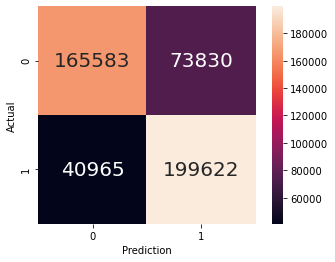

In [48]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm_knn, annot= True, annot_kws = {'size': 20}, square= True, fmt=".0f")

plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

## Part 6: Playing around

In [116]:
def predict(text):
    start_at = time.time()
    x_test = [SnowballStemmer('english').stem(word) for word in simple_preprocess(text, deacc= True)]
    x_test = (np.mean([sg_w2v_model[token] for token in x_test if token in sg_w2v_model.wv.vocab], axis= 0)).tolist()
    label = clf.predict([x_test])

    return {"label": label, "elapsed_time": time.time()-start_at}

print(predict("I hope you have a shit day"))

{'label': array(['POS'], dtype='<U3'), 'elapsed_time': 0.005550861358642578}
